In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\serom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('stopwords')  # Downloads the stopwords resource

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\serom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\serom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
url = 'https://raw.githubusercontent.com/Tshego04/Oasis-infobyte-projects/refs/heads/main/spam.csv'

df = pd.read_csv(url, encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df["Unnamed: 2"].nunique()

43

In [9]:
df["Unnamed: 2"].unique()

array([nan, ' PO Box 5249',
       ' the person is definitely special for u..... But if the person is so special',
       ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""',
       ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"',
       'this wont even start........ Datz confidence.."', 'GN',
       '.;-):-D"',
       'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""',
       ' bt not his girlfrnd... G o o d n i g h t . . .@"',
       ' I\'ll come up"',
       ' don\'t miss ur best life for anything... Gud nyt..."',
       ' just as a shop has to give a guarantee on what they sell. B. G."',
       ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"',
       ' the toughest is acting Happy with all unspoken pain inside..\\""',
       ' smoke hella weed\\""', '\\" not \\"what i need to do.\\""',
       'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD

In [10]:
df["v1"].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
df["v1"].nunique

<bound method IndexOpsMixin.nunique of 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object>

In [12]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
print(df['v1'].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


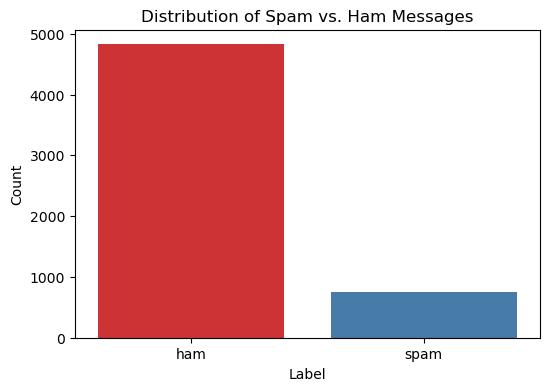

In [14]:
df["v1"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=df["v1"].value_counts().index, y=df["v1"].value_counts().values, palette="Set1")

plt.title("Distribution of Spam vs. Ham Messages")
plt.xlabel("Label")
plt.ylabel("Count")

plt.show()

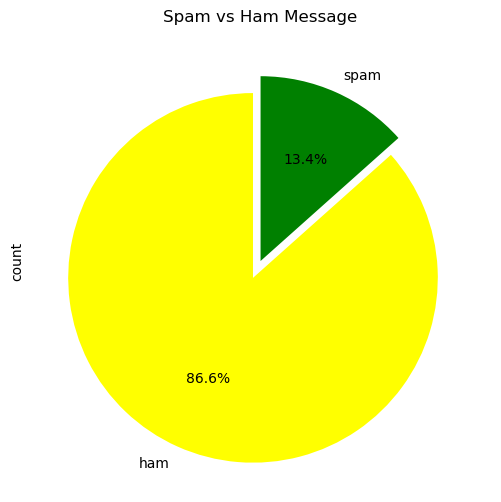

In [15]:
plt.figure(figsize=(6, 6))
df["v1"].value_counts().plot.pie(autopct="%1.1f%%", colors=["yellow", "green"], startangle=90, explode=(0.1, 0))  # explode first slice for better visibility

plt.title("Spam vs Ham Message")

plt.show()

In [17]:
nltk.download("stopwords")
nltk.download("punkt")

# Function to clean and preprocess the text
def wrangled_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Apply the preprocessing function to the dataset
df["Cleaned_v2"] = df["v2"].apply(wrangled_text)

# Display the cleaned text
print(df[["v2", "Cleaned_v2"]].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\serom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\serom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                  v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          Cleaned_v2  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


In [19]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

In [29]:
X = vectorizer.fit_transform(df["Cleaned_v2"])

# Convert labels into numerical format (spam = 1, ham = 0)
y = df["v1"].apply(lambda x: 1 if x == 'spam' else 0)

print(X.shape)

(5572, 9372)


In [21]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [23]:
# Convert the cleaned messages into a TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(df["Cleaned_v2"])

print(X_tfidf.shape)  # Shows the number of features (words)

(5572, 9372)


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.97
Confusion Matrix:
[[965   0]
 [ 38 112]]


In [33]:
def classification_of__email(email):
    # Preprocess the email
    cleaned_email = wrangled_text(email)
    
    # Convert the email into feature vector using the same vectorizer
    email_vector = tfidf_vectorizer.transform([cleaned_email])
    
    # Predict if it's spam or not
    prediction = model.predict(email_vector)
    
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Test with a new email
new_email = "Congratulations! You've won a $1000 gift card. Click here to claim your prize."
print(classification_of__email(new_email))

Spam
